
# **Week 5 Lab Notebook**

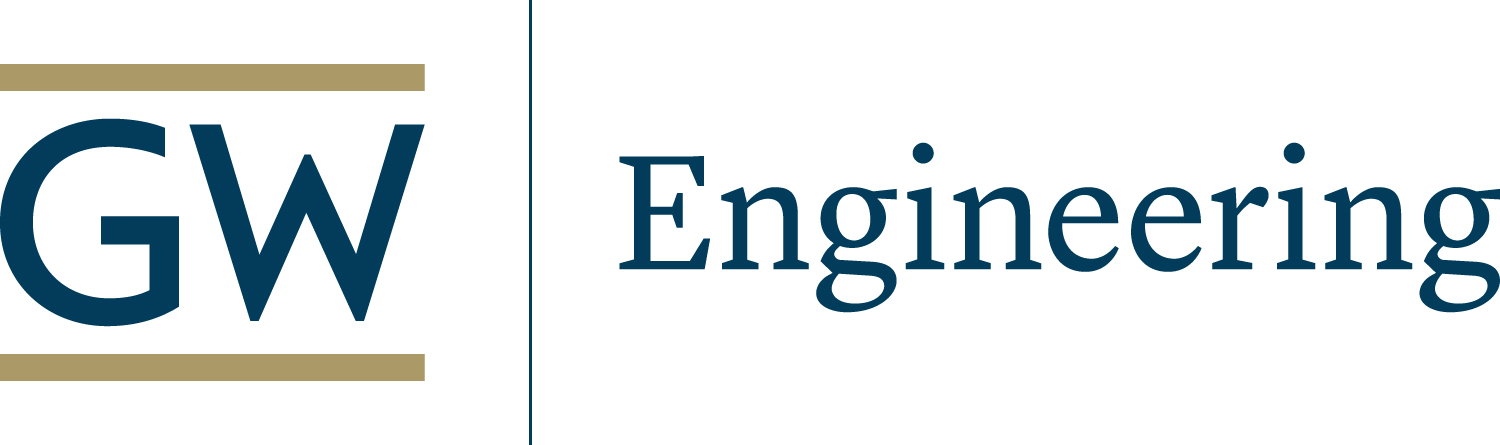

### **Logistic Regression Example 1**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

In [2]:
df_stocks = pd.read_csv('../data/Smarket.csv')

In [3]:
df_stocks.head(5)

Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up

In [4]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


In [5]:
df_stocks.describe()

Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   
max    2005.000000     5.733000     5.733000     5.733000     5.733000   

             Lag5       Volume        Today  
count  1250.00000  1250.000000  1250.000000  
mean      0.00561     1.478305     0.003138  
std       1.14755     0.360357     1.136334  
min      -4.92200     0.356070    -4.922000  
25%      -0.64000     1.257400    -0.639500  
50%       0.03850     1.422950     0.038500  
75%       0.59700     1.641675     0.596750  
max       5.73300     3.152470     5.733000

<Axes: xlabel='Direction'>

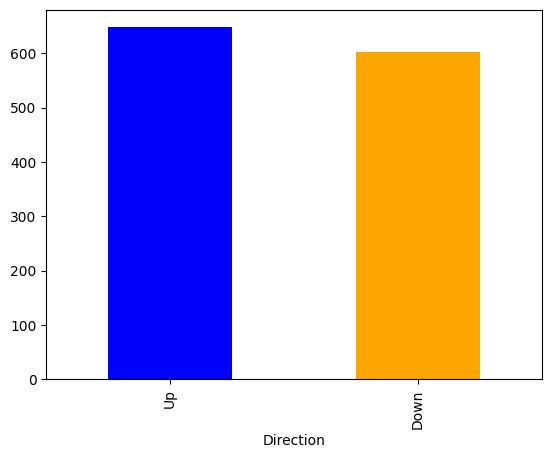

In [6]:
df_stocks['Direction'].value_counts().plot(kind='bar', color=['blue', 'orange'])

In [7]:
def convert_direction(direction):
  if direction == 'Up':
    return 1
  else:
    return 0

df_stocks['Direction'] = df_stocks['Direction'].apply(convert_direction)
print(df_stocks.head())

   Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today  Direction
0  2001  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959          1
1  2001  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032          1
2  2001  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623          0
3  2001 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614          1
4  2001  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213          1


<Figure size 1200x800 with 0 Axes>

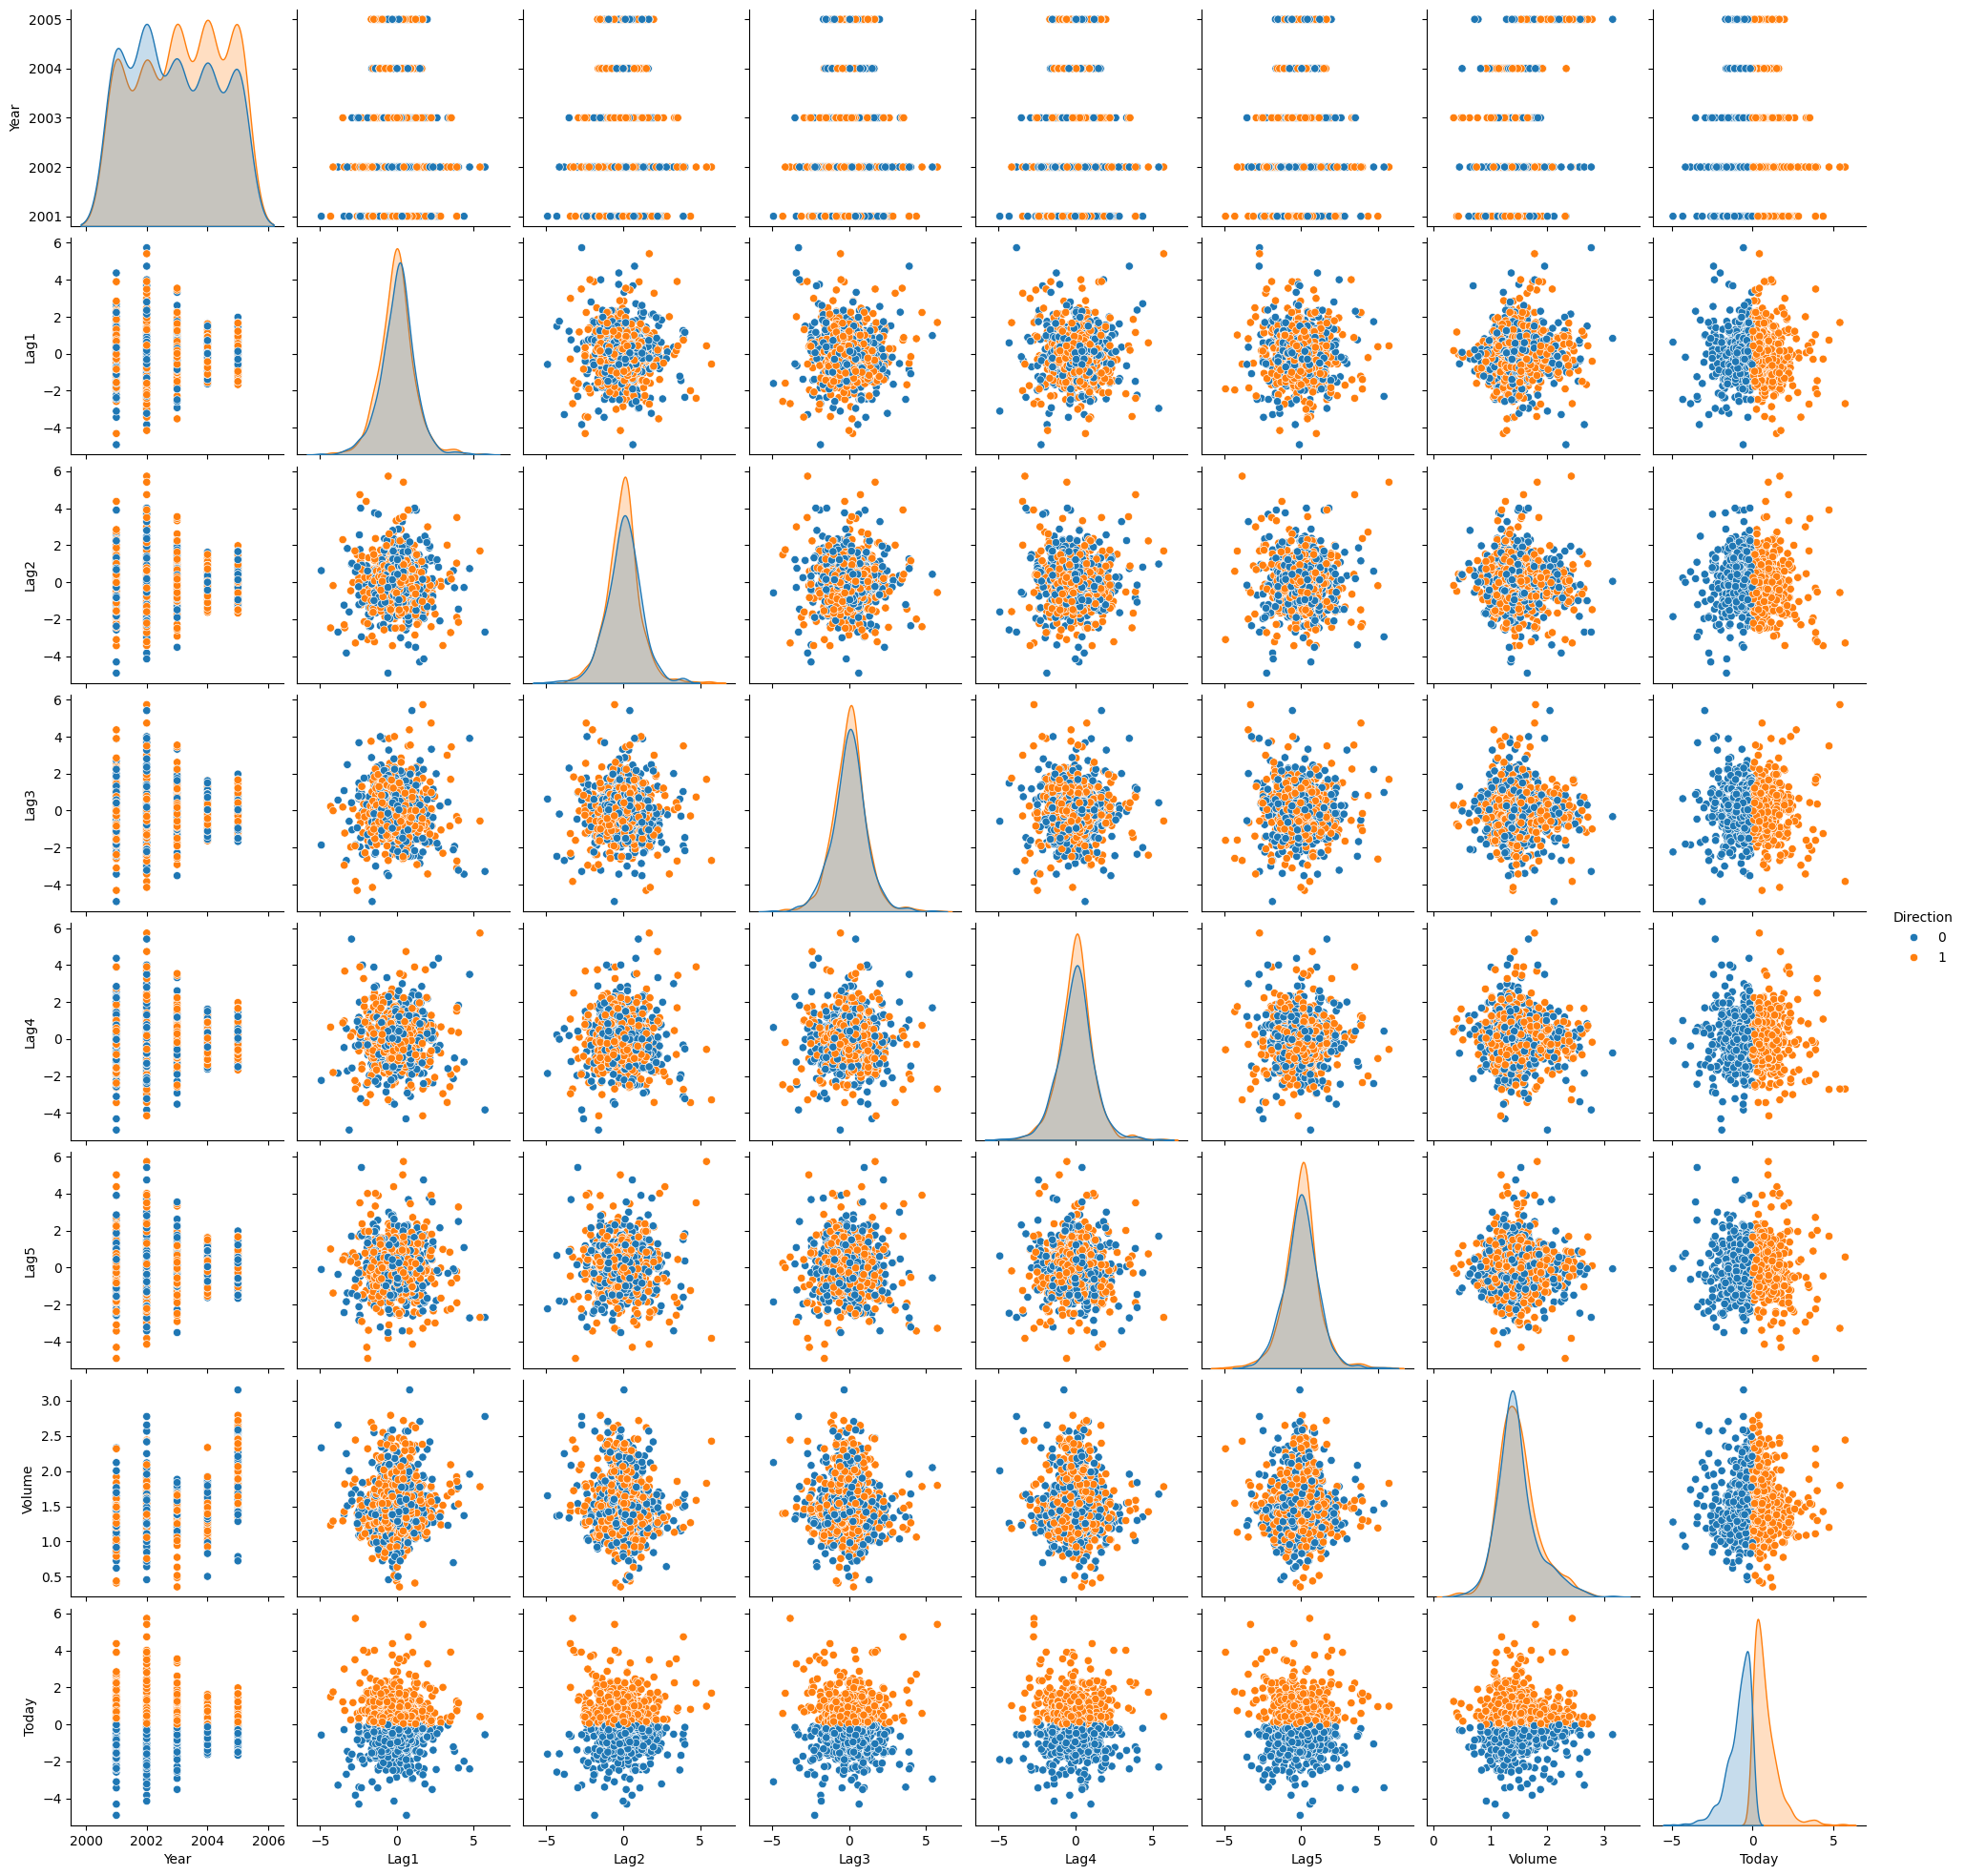

In [8]:
plt.figure(figsize=(12, 8))
sns.pairplot(df_stocks, hue='Direction')

In [9]:
allvars = df_stocks.columns.drop(['Today', 'Direction', 'Year'])

X_for_sm = sm.add_constant(df_stocks[allvars]) #remember to add a constant
X = df_stocks[allvars]
y = df_stocks.Direction


In [10]:
y

0       1
1       1
2       0
3       1
4       1
       ..
1245    1
1246    0
1247    1
1248    0
1249    0
Name: Direction, Length: 1250, dtype: int64

In [11]:
X.head()

Lag1   Lag2   Lag3   Lag4   Lag5  Volume
0  0.381 -0.192 -2.624 -1.055  5.010  1.1913
1  0.959  0.381 -0.192 -2.624 -1.055  1.2965
2  1.032  0.959  0.381 -0.192 -2.624  1.4112
3 -0.623  1.032  0.959  0.381 -0.192  1.2760
4  0.614 -0.623  1.032  0.959  0.381  1.2057

In [12]:
X_for_sm.head()

const   Lag1   Lag2   Lag3   Lag4   Lag5  Volume
0    1.0  0.381 -0.192 -2.624 -1.055  5.010  1.1913
1    1.0  0.959  0.381 -0.192 -2.624 -1.055  1.2965
2    1.0  1.032  0.959  0.381 -0.192 -2.624  1.4112
3    1.0 -0.623  1.032  0.959  0.381 -0.192  1.2760
4    1.0  0.614 -0.623  1.032  0.959  0.381  1.2057

In [13]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: Direction, dtype: int64

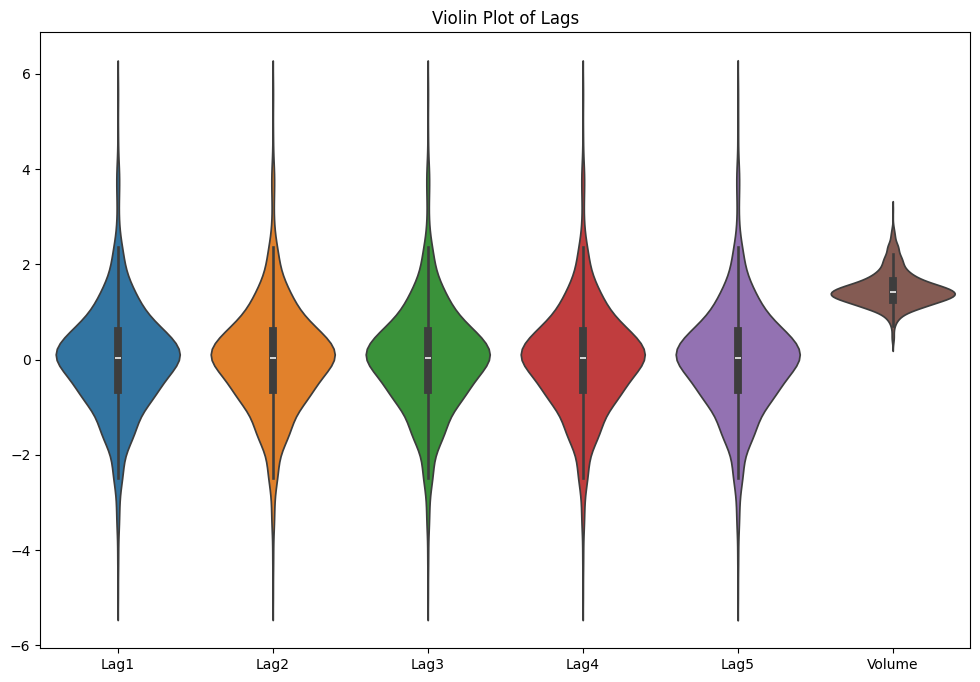

In [14]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=X)
plt.title('Violin Plot of Lags')
plt.show()

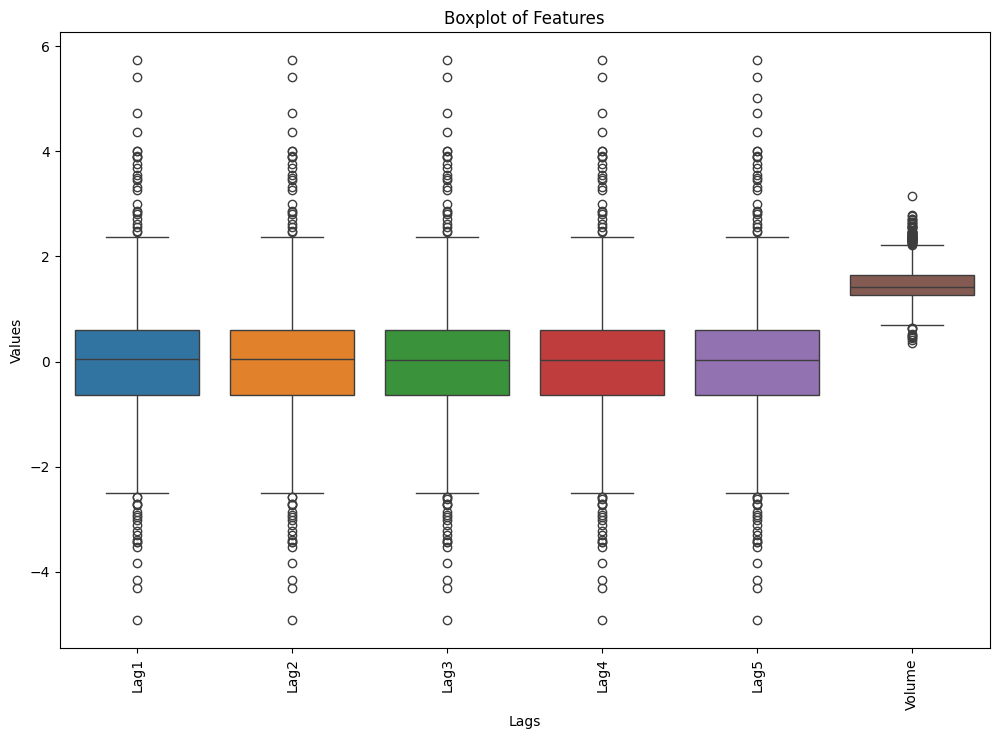

In [15]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X)
plt.title('Boxplot of Features')
plt.xlabel('Lags')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.show()

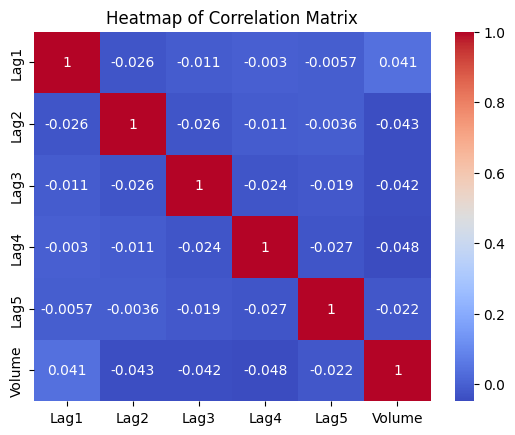

In [16]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [17]:
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.4, random_state=42)

In [18]:
model = LogisticRegression(C=.01)
model.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [19]:
model.coef_

array([[-0.039866  , -0.02994698, -0.01546191,  0.05912714,  0.00272672,
         0.0177859 ]])

In [20]:
model.intercept_

array([-0.04294716])

In [21]:
model.classes_

array([0, 1])

In [22]:
X_test_sm, X_train_sm, y_test_sm, y_train_sm = train_test_split(X_for_sm, y, test_size=0.2, random_state=42)

In [23]:
model_sm = sm.Logit(y_train_sm, X_train_sm)
result = model_sm.fit()

# Print the summary which includes p-values and z-statistics
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.687659
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                  250
Model:                          Logit   Df Residuals:                      243
Method:                           MLE   Df Model:                            6
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                0.005667
Time:                        21:44:45   Log-Likelihood:                -171.91
converged:                       True   LL-Null:                       -172.89
Covariance Type:            nonrobust   LLR p-value:                    0.9234
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4677      0.539     -0.867      0.386      -1.525       0.589
Lag1          -0.0121      0.

Is Logistic Regression a good method for predicting up/down?

1. Default Settings and Regularization:
scikit-learn: By default, LogisticRegression applies L2 regularization (also known as ridge regularization). Regularization adds a penalty to the model to prevent overfitting but can slightly alter the coefficient estimates.
Regularization is controlled by the C parameter, where C is the inverse of regularization strength. The default is C=1.0.
statsmodels: The Logit model in statsmodels does not apply regularization by default, so it’s a pure maximum likelihood estimation (MLE).
2. Solver Differences:
scikit-learn: Uses different solvers (e.g., liblinear, saga, lbfgs, etc.) to optimize the logistic regression model. The solver can impact the convergence and the final parameter estimates.
statsmodels: Uses the Newton-Raphson method by default for optimization.
3. Intercept Handling:
scikit-learn: Automatically includes an intercept term unless you set fit_intercept=False.
statsmodels: Requires you to manually add a constant term using sm.add_constant(X).
4. Data Scaling:
scikit-learn: May expect that the features are scaled (e.g., using StandardScaler), especially when using regularization.
statsmodels: Does not require scaling, but you can still scale the data before fitting the model.
5. Different Objective Functions:
The two libraries might be minimizing slightly different objective functions due to regularization and other settings, leading to different results.

TESTING AND RESULTS

In [24]:
y_pred = model.predict(X_test)

In [25]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=[True, False])

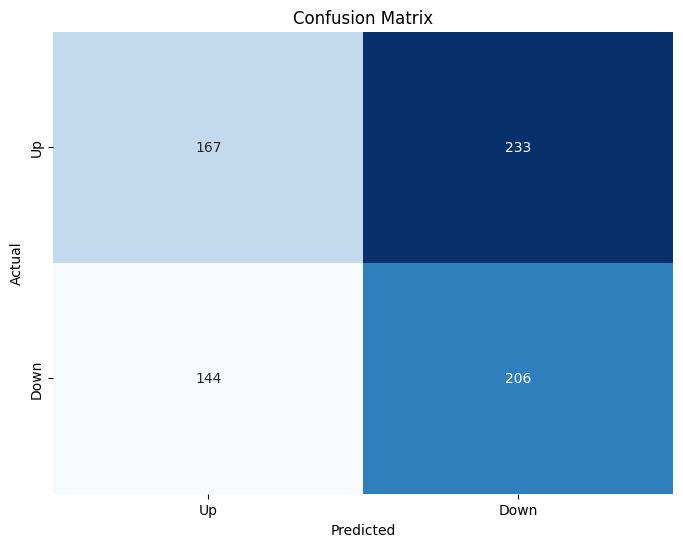

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Up', 'Down'],
            yticklabels=['Up', 'Down'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
print(classification_report(y_test, y_pred, labels=[True, False]))

              precision    recall  f1-score   support

        True       0.54      0.42      0.47       400
       False       0.47      0.59      0.52       350

    accuracy                           0.50       750
   macro avg       0.50      0.50      0.50       750
weighted avg       0.51      0.50      0.49       750



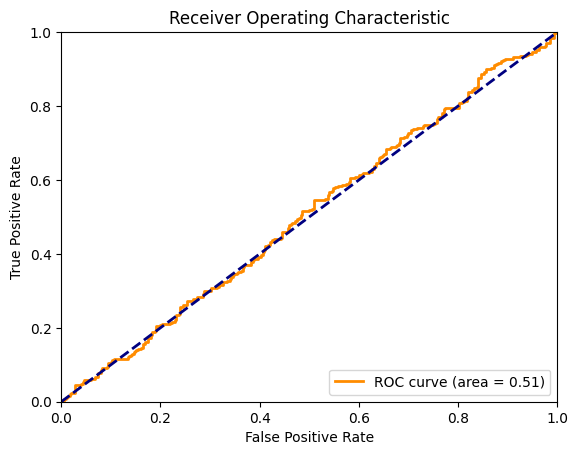

In [28]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [29]:
y_train_pred = model.predict(X_train)

# Step 5: Calculate accuracy for both sets
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 52.00%
Testing Accuracy: 49.73%


### **Logistic Regression Example 2**

In [42]:
df_heart2 = pd.read_csv('../data/heart.csv')

In [43]:
df_heart2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [44]:
df_heart2.head(5)

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No

In [32]:
df_heart2.describe()

Unnamed: 0         Age         Sex      RestBP        Chol         Fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean   152.000000   54.438944    0.679868  131.689769  246.693069    0.148515   
std     87.612784    9.038662    0.467299   17.599748   51.776918    0.356198   
min      1.000000   29.000000    0.000000   94.000000  126.000000    0.000000   
25%     76.500000   48.000000    0.000000  120.000000  211.000000    0.000000   
50%    152.000000   56.000000    1.000000  130.000000  241.000000    0.000000   
75%    227.500000   61.000000    1.000000  140.000000  275.000000    0.000000   
max    303.000000   77.000000    1.000000  200.000000  564.000000    1.000000   

          RestECG       MaxHR       ExAng     Oldpeak       Slope          Ca  
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241  
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438  
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000  
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000  
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000  
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000  
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000

In [49]:
df_heart2.head(5)

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed    0  
1      1      1.5      2  3.0      normal    1  
2      1      2.6      2  2.0  reversable    1  
3      0      3.5      3  0.0      normal    0  
4      0      1.4      1  0.0      normal    0

In [34]:
df_heart2.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [35]:
# imputer = SimpleImputer(strategy='mean')
# df_imputed = pd.DataFrame(imputer.fit_transform(df_heart2), columns=df_heart2.columns)

df_imputed = df_heart2.dropna()

In [40]:
df_imputed.isna().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            0
Thal          0
AHD           0
dtype: int64

In [124]:
df_imputed['AHD'] = df_imputed['AHD'].map({'Yes': 1, 'No': 0})


In [125]:
df_imputed['AHD'].value_counts()

AHD
0    160
1    137
Name: count, dtype: int64

<Axes: xlabel='AHD'>

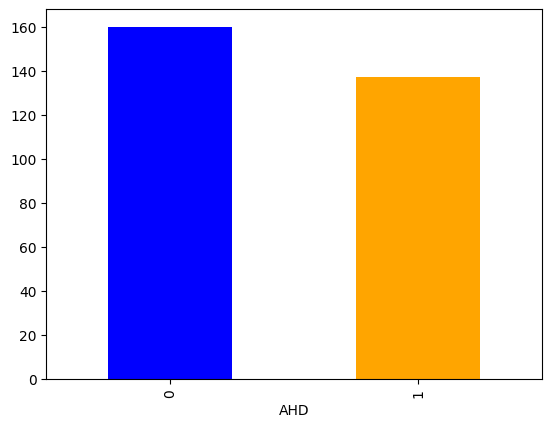

In [126]:
df_imputed['AHD'].value_counts().plot(kind='bar', color=['blue', 'orange'])

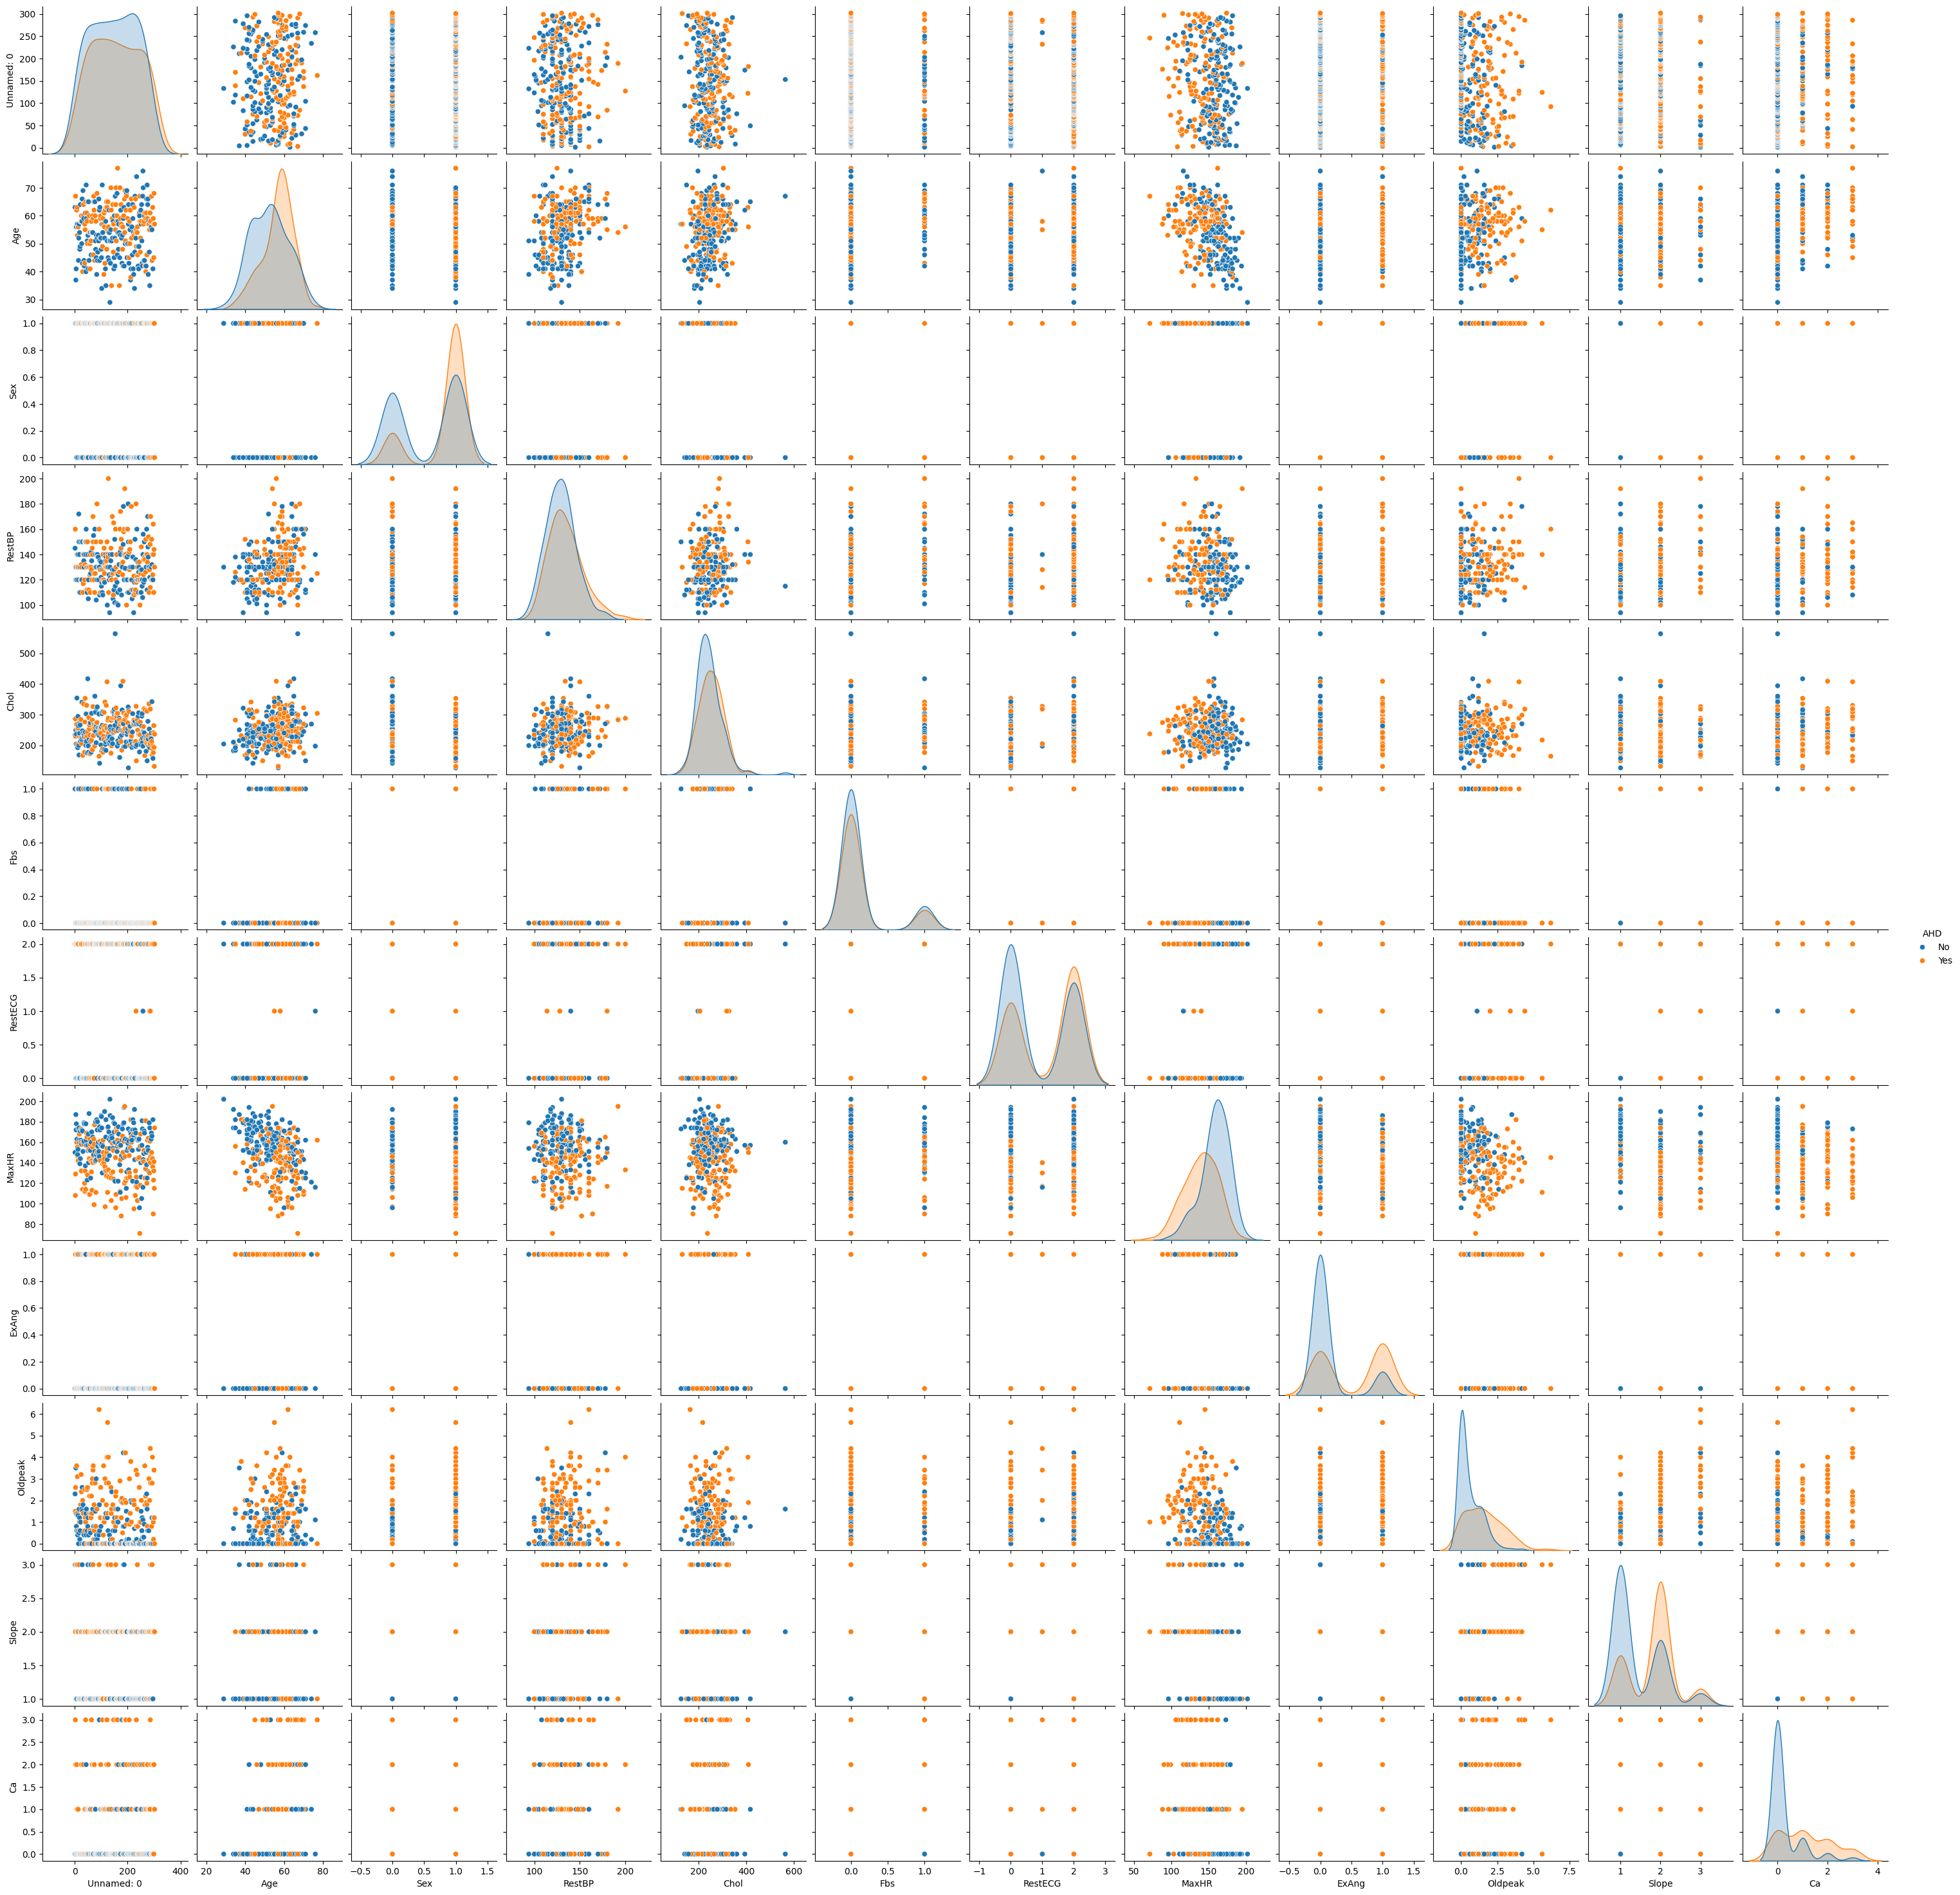

In [52]:
sns.pairplot(df_imputed, hue='AHD')

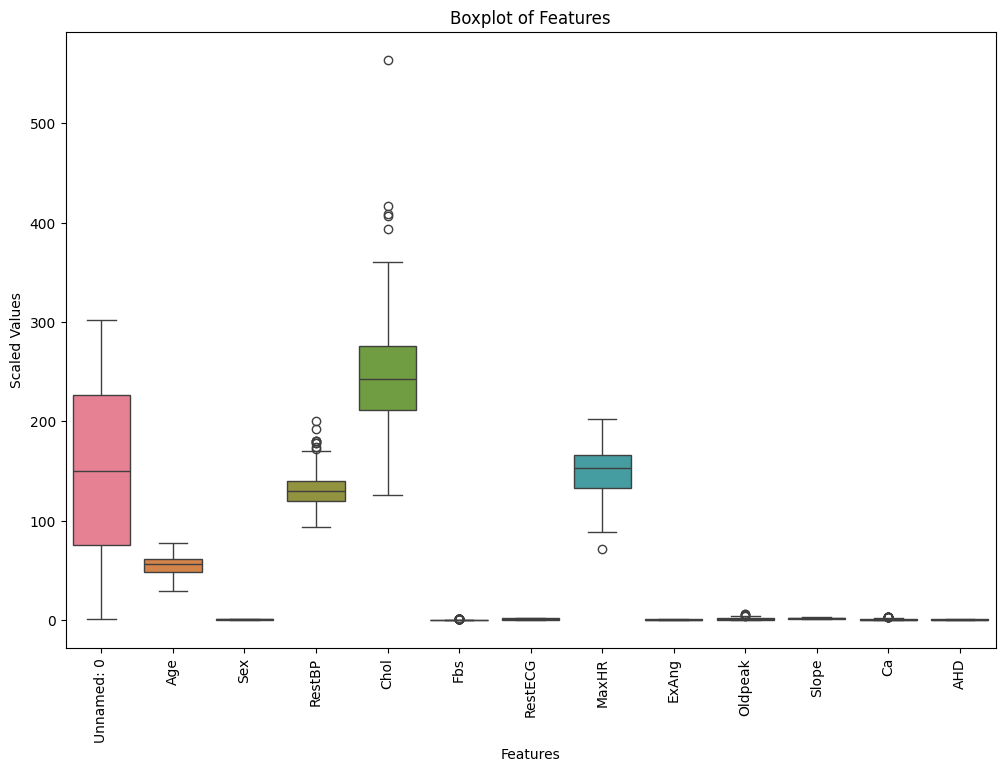

In [127]:
# Create a boxplot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_imputed)
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.xticks(rotation=90)
plt.show()

In [128]:
X = df_imputed.drop(['AHD'], axis=1)
y = df_imputed['AHD']

In [129]:
X.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal'],
      dtype='object')

In [130]:
X.head()

Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  
0      0      2.3      3  0.0       fixed  
1      1      1.5      2  3.0      normal  
2      1      2.6      2  2.0  reversable  
3      0      3.5      3  0.0      normal  
4      0      1.4      1  0.0      normal

In [131]:
y

0      0
1      1
2      1
3      0
4      0
      ..
297    1
298    1
299    1
300    1
301    1
Name: AHD, Length: 297, dtype: int64

In [132]:
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named 'df'
le = LabelEncoder()

# Loop through all columns with dtype 'object'
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

In [133]:
X.head()

Unnamed: 0  Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  \
0           1   63    1          3     145   233    1        2    150      0   
1           2   67    1          0     160   286    0        2    108      1   
2           3   67    1          0     120   229    0        2    129      1   
3           4   37    1          1     130   250    0        0    187      0   
4           5   41    0          2     130   204    0        2    172      0   

   Oldpeak  Slope   Ca  Thal  
0      2.3      3  0.0     0  
1      1.5      2  3.0     1  
2      2.6      2  2.0     2  
3      3.5      3  0.0     1  
4      1.4      1  0.0     1

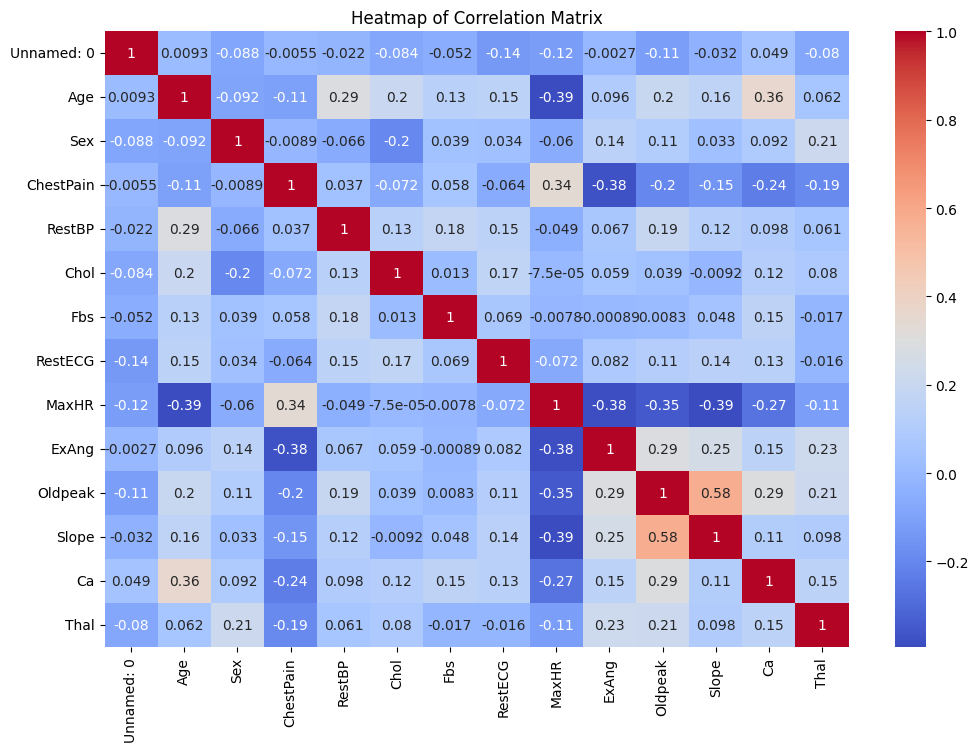

In [134]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

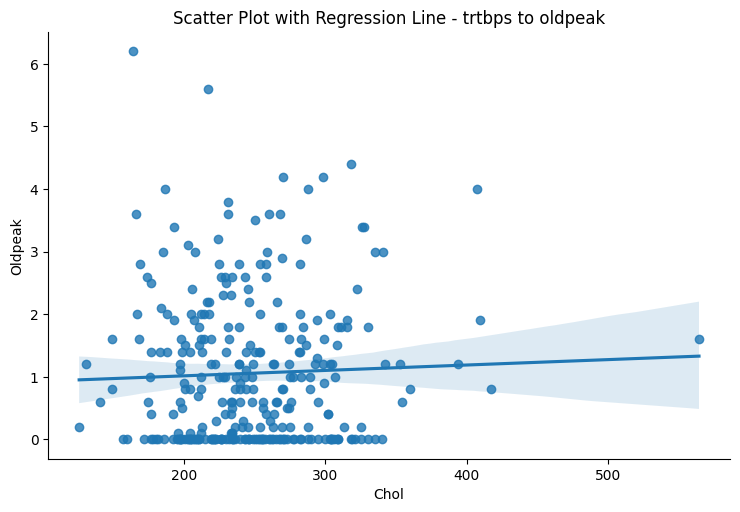

In [135]:
sns.lmplot(x='Chol', y='Oldpeak', data=X, aspect=1.5)
plt.title('Scatter Plot with Regression Line - trtbps to oldpeak')
plt.show()

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [165]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))


In [166]:
X_train_scaled.columns = X.columns
X_test_scaled.columns = X.columns
X_train_scaled.index = X_train.index
X_test_scaled.index = X_test.index

# X_train_scaled = X_train
# X_test_scaled = X_test

In [167]:
X_test_scaled.shape

(90, 14)

In [168]:
X_train_scaled.head()

Unnamed: 0       Age       Sex  ChestPain    RestBP      Chol       Fbs  \
270    1.366288  0.728560  0.661438  -0.843465  0.500301 -0.786293 -0.435494   
37    -1.336864  0.283030  0.661438  -0.843465  1.086392  0.503842 -0.435494   
16    -1.580496 -0.719412  0.661438   1.235074 -1.257973 -0.374946 -0.435494   
256    1.203867  1.396855 -1.511858  -0.843465 -1.492409 -0.487131 -0.435494   
145   -0.083901 -0.830795  0.661438   0.195804 -1.375191 -0.113179 -0.435494   

      RestECG     MaxHR     ExAng   Oldpeak     Slope        Ca      Thal  
270  0.916539 -0.442406  1.384013  0.787175 -1.009196  0.298941  1.146423  
37   0.916539 -1.555556  1.384013 -0.370992  0.648769  0.298941 -2.292846  
16  -1.101797  0.841998 -0.722536 -0.014633  2.306733 -0.732405  1.146423  
256 -1.101797 -0.271152 -0.722536 -0.638262 -1.009196  1.330286 -0.573212  
145 -1.101797  0.156983 -0.722536 -0.905531 -1.009196 -0.732405 -0.573212

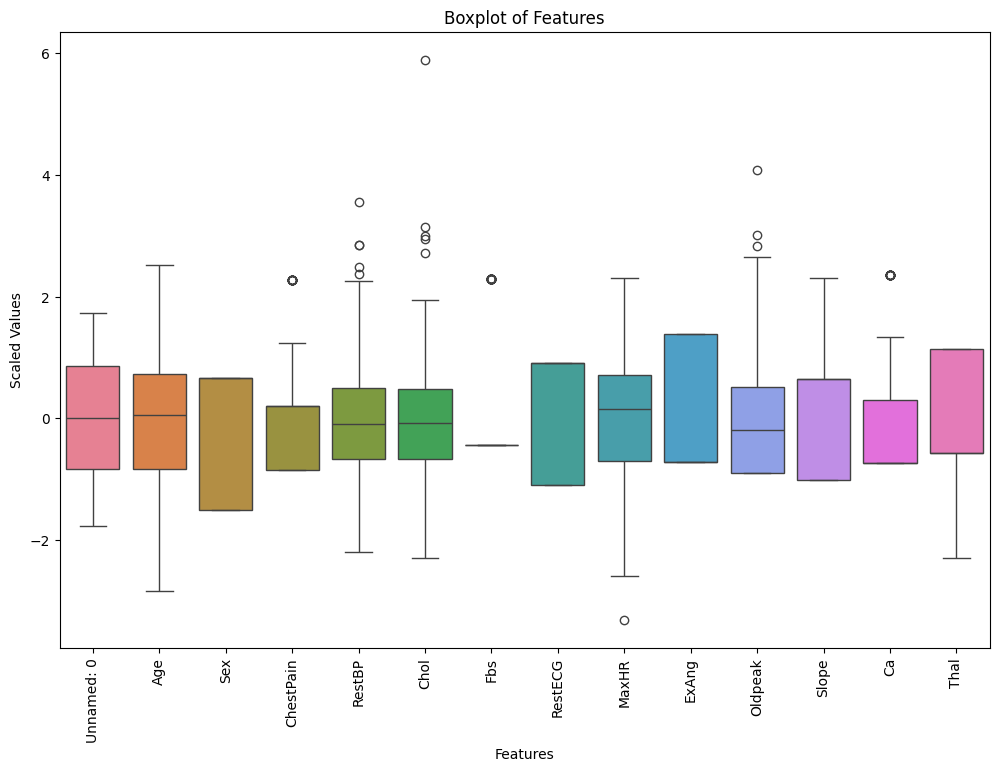

In [169]:
# Create a boxplot for each feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=X_train_scaled)
plt.title('Boxplot of Features')
plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.xticks(rotation=90)
plt.show()

In [170]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [171]:
y_pred = model.predict(X_test_scaled)

In [173]:
conf_matrix = confusion_matrix(y_test, y_pred)

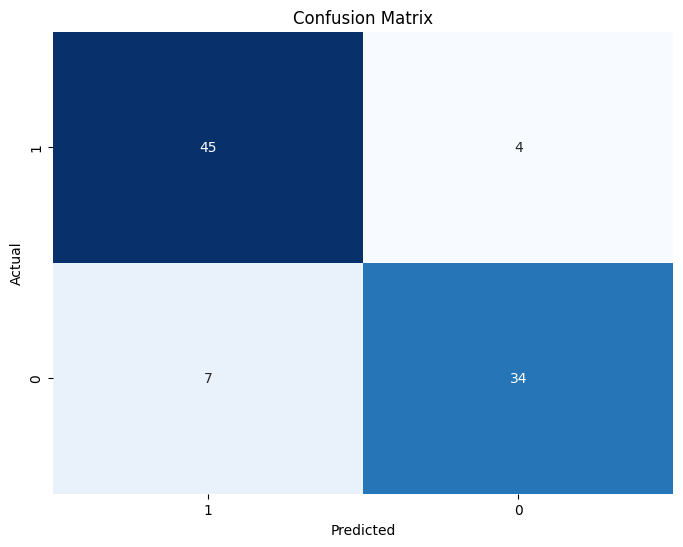

In [174]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['1', '0'],
            yticklabels=['1', '0'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [175]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89        49
           1       0.89      0.83      0.86        41

    accuracy                           0.88        90
   macro avg       0.88      0.87      0.88        90
weighted avg       0.88      0.88      0.88        90



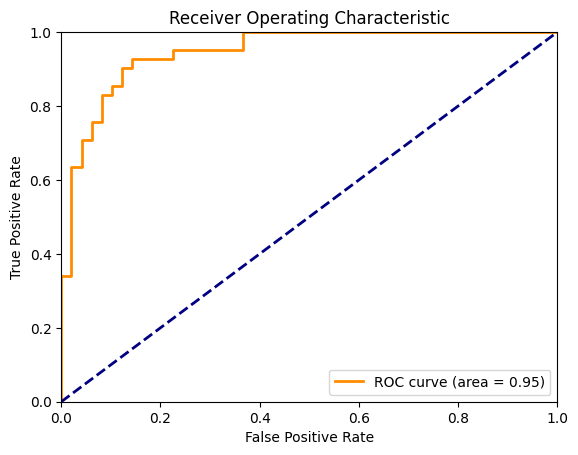

In [176]:
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [177]:

X_train_scaled = sm.add_constant(X_train_scaled) #remember to add a constant
X_test_scaled = sm.add_constant(X_test_scaled) #remember to add a constant


In [188]:
X_train_scaled.head()

const  Unnamed: 0       Age       Sex  ChestPain    RestBP      Chol  \
270    1.0    1.366288  0.728560  0.661438  -0.843465  0.500301 -0.786293   
37     1.0   -1.336864  0.283030  0.661438  -0.843465  1.086392  0.503842   
16     1.0   -1.580496 -0.719412  0.661438   1.235074 -1.257973 -0.374946   
256    1.0    1.203867  1.396855 -1.511858  -0.843465 -1.492409 -0.487131   
145    1.0   -0.083901 -0.830795  0.661438   0.195804 -1.375191 -0.113179   

          Fbs   RestECG     MaxHR     ExAng   Oldpeak     Slope        Ca  \
270 -0.435494  0.916539 -0.442406  1.384013  0.787175 -1.009196  0.298941   
37  -0.435494  0.916539 -1.555556  1.384013 -0.370992  0.648769  0.298941   
16  -0.435494 -1.101797  0.841998 -0.722536 -0.014633  2.306733 -0.732405   
256 -0.435494 -1.101797 -0.271152 -0.722536 -0.638262 -1.009196  1.330286   
145 -0.435494 -1.101797  0.156983 -0.722536 -0.905531 -1.009196 -0.732405   

         Thal  
270  1.146423  
37  -2.292846  
16   1.146423  
256 -0.573212  
145 -0.573212

In [ ]:
# Fit the logistic regression model
model_sm = sm.Logit(y_train, X_train_scaled)
result = model_sm.fit()

# Print the summary which includes p-values and z-statistics
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.365474
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                    AHD   No. Observations:                  207
Model:                          Logit   Df Residuals:                      192
Method:                           MLE   Df Model:                           14
Date:                Fri, 18 Apr 2025   Pseudo R-squ.:                  0.4707
Time:                        22:38:09   Log-Likelihood:                -75.653
converged:                       True   LL-Null:                       -142.94
Covariance Type:            nonrobust   LLR p-value:                 8.489e-22
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0350      0.218     -0.160      0.872      -0.463       0.393
Unnamed: 0     0.1467      0.

In [190]:
assert (X_train_scaled.columns == X_test_scaled.columns).all()


In [203]:
y_train_pred = result.predict(X_train_scaled)
y_test_pred = result.predict(X_test_scaled)

# Convert probabilities to binary predictions using a threshold of 0.5
y_train_pred_binary = (y_train_pred >= 0.5).astype(int)
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)

train_accuracy = accuracy_score(y_train, y_train_pred_binary)
test_accuracy = accuracy_score(y_test, y_test_pred_binary)

print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

Testing Accuracy: 87.78%
Training Accuracy: 85.51%


In [257]:
X1_train = X_train.drop(['Unnamed: 0', 'RestECG'], axis=1)
X1_test = X_test.drop(['Unnamed: 0', 'RestECG'], axis=1)

In [258]:
X1_train = X_train.drop(['Age', 'Fbs'], axis=1)
X1_test = X_test.drop(['Age', 'Fbs'], axis=1)

In [ ]:
# X1_train = X_train.drop(['Oldpeak', 'Slope'], axis=1)
# X1_test = X_test.drop(['Oldpeak', 'Slope'], axis=1)

In [259]:
# X1_train_scaled = scaler.fit_transform(X1_train)
# X1_test_scaled = scaler.transform(X1_test)

X1_train_scaled = X1_train
X1_test_scaled = X1_test

In [265]:
model1 = LogisticRegression(max_iter=1000, C=.5)
model1.fit(X1_train_scaled, y_train)

LogisticRegression(C=0.5, max_iter=1000)

In [266]:
y1_pred = model1.predict(X1_test_scaled)

In [267]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=[True, False])

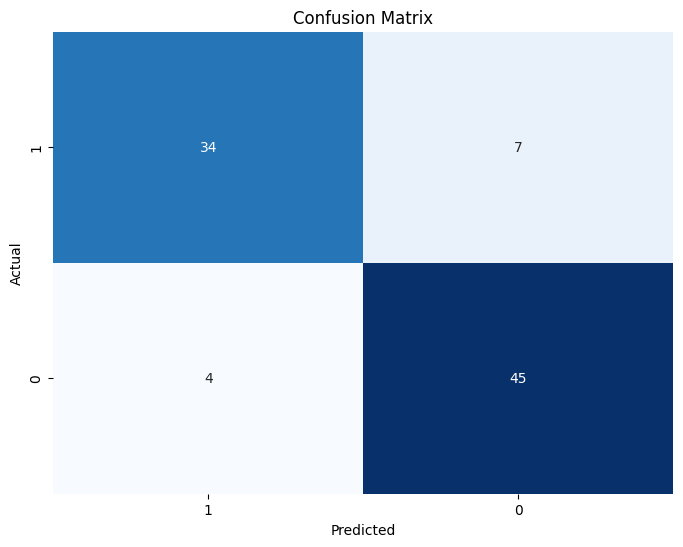

In [268]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['1', '0'],
            yticklabels=['1', '0'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

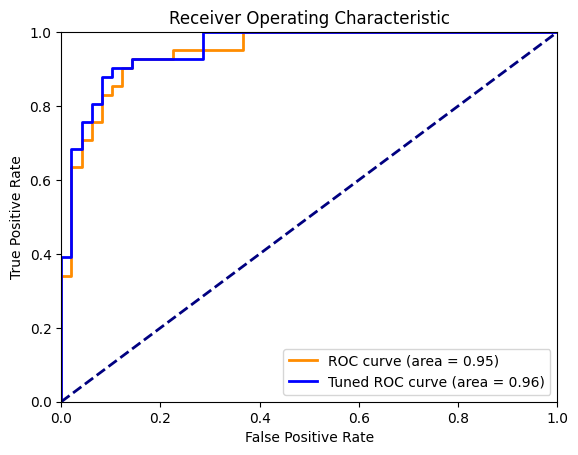

In [269]:
y1_pred_prob = model1.predict_proba(X1_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, y1_pred_prob)
roc_auc1 = auc(fpr1, tpr1)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr1, tpr1, color='blue', lw=2, label='Tuned ROC curve (area = %0.2f)' % roc_auc1)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [270]:
y1_train_pred = model1.predict(X1_train_scaled)

train_accuracy = accuracy_score(y_train, y1_train_pred)
test_accuracy = accuracy_score(y_test, y1_pred)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Testing Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 83.57%
Testing Accuracy: 85.56%
